## Tweet Emotion Recognition: Natural Language Processing with TensorFlow

---

Dataset: [Tweet Emotion Dataset](https://github.com/dair-ai/emotion_dataset)

This is a starter notebook for the guided project [Tweet Emotion Recognition with TensorFlow](https://www.coursera.org/projects/tweet-emotion-tensorflow)

A complete version of this notebook is available in the course resources

---

## Task 1: Introduction

## Task 2: Setup and Imports

1. Installing Hugging Face's nlp package
2. Importing libraries

In [ ]:
!pip install nlp

In [2]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import nlp
import random


def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    
def show_confusion_matrix(y_true, y_pred, classes):
    from sklearn.metrics import confusion_matrix
    
    cm = confusion_matrix(y_true, y_pred, normalize='true')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 6)), labels=classes)
    plt.yticks(list(range(0, 6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()

    
print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.8.2


## Task 3: Importing Data

1. Importing the Tweet Emotion dataset
2. Creating train, validation and test sets
3. Extracting tweets and labels from the examples

In [ ]:
dataset = nlp.load_dataset('emotion')

In [4]:
dataset

{'train': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 16000),
 'validation': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 2000),
 'test': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 2000)}

In [5]:
train = dataset['train']
val = dataset['validation']
test = dataset['test']

In [6]:
def get_tweet(data):
  tweets = [x['text'] for x in data]
  labels = [x['label'] for x in data]
  return tweets, labels

In [7]:
tweets, labels = get_tweet(train)


In [8]:
tweets[0], labels[0]

('i didnt feel humiliated', 'sadness')

## Task 4: Tokenizer

1. Tokenizing the tweets

In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer 

In [15]:
tokenizer = Tokenizer(num_words = 10000, oov_token = '<UNK>')
tokenizer.fit_on_texts(tweets)

In [17]:
tokenizer.texts_to_sequences([tweets[0]])

[[2, 139, 3, 679]]

## Task 5: Padding and Truncating Sequences

1. Checking length of the tweets
2. Creating padded sequences

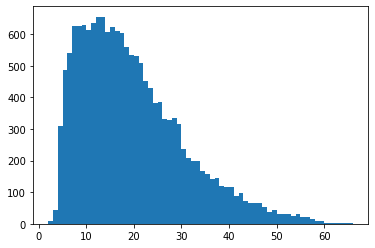

In [20]:
lenght = [len(t.split(' ')) for t in tweets]
plt.hist(lenght, bins = len(set(lenght)))
plt.show()

In [21]:
max_len = 50

from tensorflow.keras.preprocessing.sequence import pad_sequences

In [24]:
def get_sequence(tokenizer, tweets):
  sequences = tokenizer.texts_to_sequences(tweets)
  padded = pad_sequences(sequences, truncating = 'post', padding = 'post', maxlen = max_len)
  return padded

In [25]:
padded_train_seq = get_sequence(tokenizer, tweets)

In [26]:
padded_train_seq[0]

array([  2, 139,   3, 679,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int32)

## Task 6: Preparing the Labels

1. Creating classes to index and index to classes dictionaries
2. Converting text labels to numeric labels

In [27]:
classes = set(labels)
print(classes)

{'joy', 'love', 'sadness', 'fear', 'anger', 'surprise'}


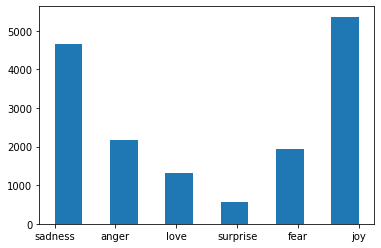

In [29]:
plt.hist(labels, bins = 11)
plt.show()

In [35]:
class_to_index = dict((c, i) for i, c in enumerate(classes))
index_to_class = dict((u, k) for k, u in class_to_index.items())

In [37]:
class_to_index

{'joy': 0, 'love': 1, 'sadness': 2, 'fear': 3, 'anger': 4, 'surprise': 5}

In [38]:
index_to_class

{0: 'joy', 1: 'love', 2: 'sadness', 3: 'fear', 4: 'anger', 5: 'surprise'}

In [39]:
names_to_ids = lambda labels: np.array([class_to_index.get(x) for x in labels]) 

In [40]:
train_labels = names_to_ids(labels)
print(train_labels[0])

2


## Task 7: Creating the Model

1. Creating the model
2. Compiling the model

In [45]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(10000, 16, input_length = max_len),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences = True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
    tf.keras.layers.Dense(6, activation = 'softmax')
])

model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [47]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 50, 16)            160000    
                                                                 
 bidirectional_5 (Bidirectio  (None, 50, 40)           5920      
 nal)                                                            
                                                                 
 bidirectional_6 (Bidirectio  (None, 40)               9760      
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 6)                 246       
                                                                 
Total params: 175,926
Trainable params: 175,926
Non-trainable params: 0
_________________________________________________________________


## Task 8: Training the Model

1. Preparing a validation set
2. Training the model

In [49]:
val_tweets, val_labels = get_tweet(val)
val_seq = get_sequence(tokenizer, val_tweets)
val_labels = names_to_ids(val_labels)

In [50]:
val_tweets[0], val_labels[0]

('im feeling quite sad and sorry for myself but ill snap out of it soon', 2)

In [56]:
h = model.fit(
    padded_train_seq, train_labels,
    validation_data = (val_seq, val_labels),
    epochs = 20,
    callbacks = [
        tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy', patience = 2)
    ]
)

Epoch 1/20
500/500 [==============================] - 8s 16ms/step - loss: 0.2080 - accuracy: 0.9314 - val_loss: 0.3984 - val_accuracy: 0.8745
Epoch 2/20
500/500 [==============================] - 6s 13ms/step - loss: 0.1418 - accuracy: 0.9553 - val_loss: 0.4194 - val_accuracy: 0.8795
Epoch 3/20
500/500 [==============================] - 7s 14ms/step - loss: 0.1112 - accuracy: 0.9672 - val_loss: 0.4045 - val_accuracy: 0.8845
Epoch 4/20
500/500 [==============================] - 6s 13ms/step - loss: 0.0911 - accuracy: 0.9713 - val_loss: 0.3937 - val_accuracy: 0.8890
Epoch 5/20
500/500 [==============================] - 6s 13ms/step - loss: 0.0737 - accuracy: 0.9755 - val_loss: 0.4050 - val_accuracy: 0.8950
Epoch 6/20
500/500 [==============================] - 6s 12ms/step - loss: 0.0676 - accuracy: 0.9776 - val_loss: 0.4013 - val_accuracy: 0.8890
Epoch 7/20
500/500 [==============================] - 6s 12ms/step - loss: 0.0583 - accuracy: 0.9799 - val_loss: 0.3932 - val_accuracy: 0.8970

## Task 9: Evaluating the Model

1. Visualizing training history
2. Prepraring a test set
3. A look at individual predictions on the test set
4. A look at all predictions on the test set

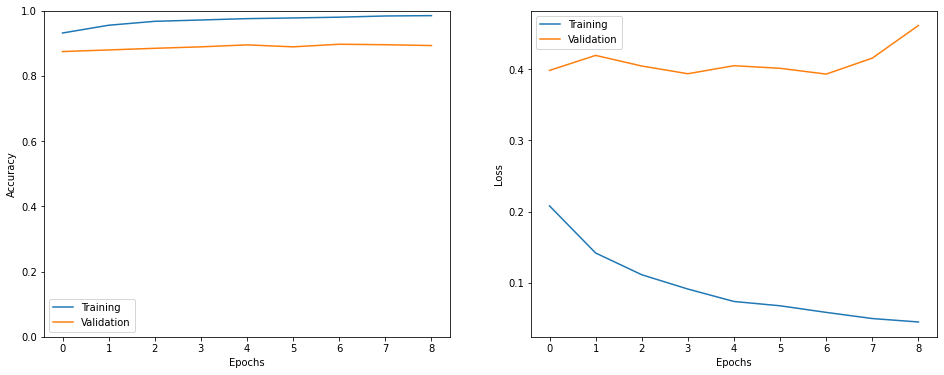

In [57]:
show_history(h)

In [58]:
test_tweets, test_labels = get_tweet(test)
test_seq = get_sequence(tokenizer, test_tweets)
test_labels = names_to_ids(test_labels)

In [59]:
_ = model.evaluate(test_seq, test_labels)

63/63 [==============================] - 0s 6ms/step - loss: 0.4048 - accuracy: 0.8935


In [65]:
preds = model.predict(test_seq)
preds_classes=np.argmax(preds,axis=1)

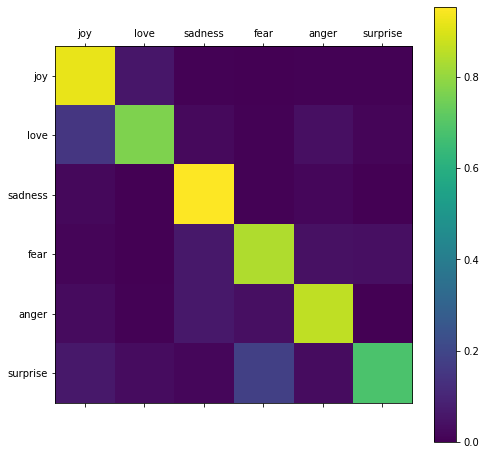

In [66]:
show_confusion_matrix(test_labels, preds_classes, classes)